In [225]:
import pandas as pd

In [226]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [227]:
#EDA
train.head(20)
test.head()
train.shape
test.shape
train.info()
test.info()
train.isnull().sum()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
#범주형 -> 바차트
def barChart(f):
    survived=train[train['Survived']==1][f].value_counts()
    dead=train[train['Survived']==0][f].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'Dead']
    df.plot(kind='bar', figsize=(10,5), stacked=True)   

남성보다 여성이 많이 생존한것으로 보여집니다

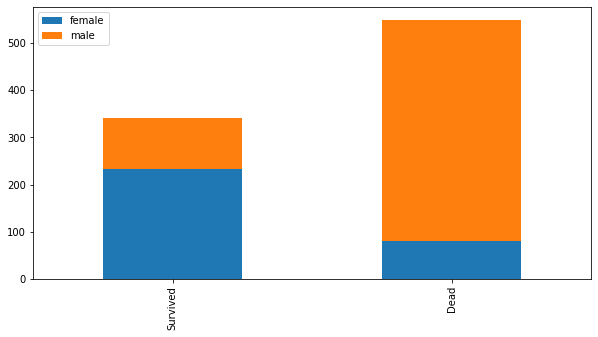

In [230]:
barChart('Sex') #성별에 따른 생존자/사망자 시각화

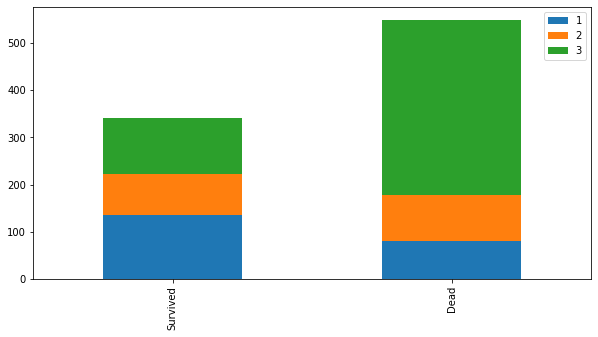

In [231]:
barChart('Pclass')

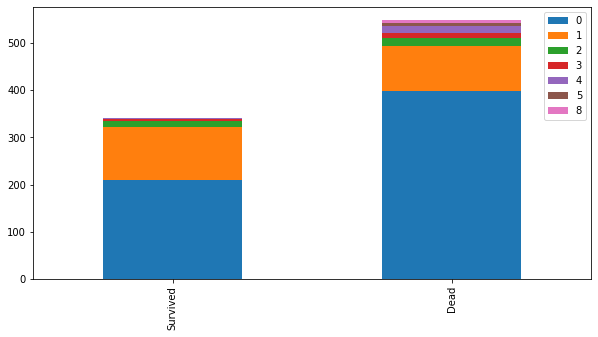

In [232]:
barChart('SibSp')

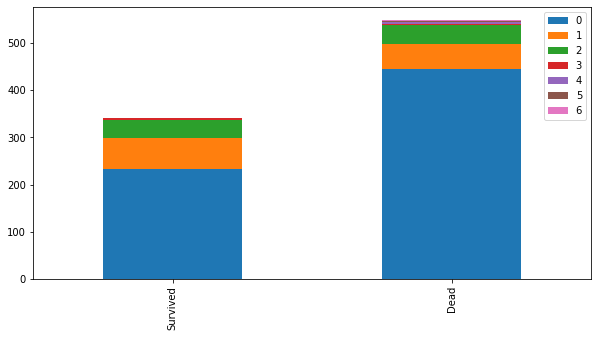

In [233]:
barChart('Parch')

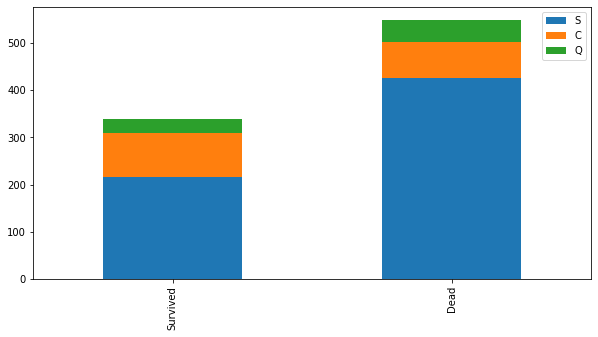

In [234]:
barChart('Embarked')

In [235]:
"""
특성공학: 머신러닝을 위한 데이터 전처리
"""
trainTestData=[train,test]#2개의 데이터 프레임이 묶여서 리스트
trainTestData[0].shape

for d in trainTestData:
    d['Title']=d['Name'].str.extract(" ([A-Za-z]+)\.")
    #print(d['Name'])
#공백다음에 소괄호, 소괄호 내부에는 영문자 1글자 이상, 
#마지막글자는 점(.)으로 끝나야 함

In [236]:
train['Title'].value_counts()
test['Title'].value_counts()
#Mr:0, Miss:1, Mrs:2, Others:3

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [237]:
tm={"Mr":0, "Miss":1, "Mrs":2,  
    "Master":3, "Rev":3, "Col":3, "Dona":3, "Dr":3,
    "Ms":2, "Jonkheer":3,"Countess":2,"Lady":2,   
    "Sir":3, "Don":3,"Capt":3,"Mme":3,      
    "Major":3,"Mlle":3 }
for data in trainTestData:
    data['Title']=data['Title'].map(tm)

In [238]:
test['Title'].value_counts()

0    240
1     78
2     73
3     27
Name: Title, dtype: int64

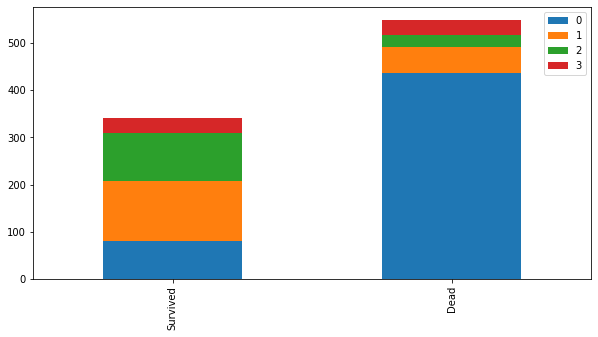

In [239]:
barChart('Title')

In [240]:
train.drop('Name',axis=1,inplace=True)

In [241]:
test.drop('Name',axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


In [242]:
tm={"male":0, "female":1}
for data in trainTestData:
    data['Sex']=data['Sex'].map(tm)

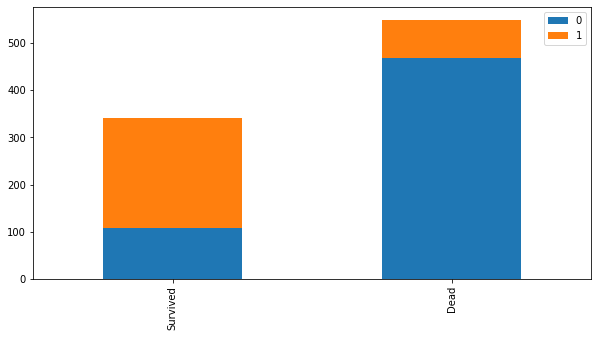

In [243]:
barChart('Sex')

In [244]:
train.head(50)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [245]:
#print(train.head(10))
train.groupby("Title")['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [246]:
train['Age'].fillna(train.groupby("Title")['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby("Title")['Age'].transform('median'), inplace=True)
#Mr 호칭, 나이 Nan -> Mr의 나이 중간값으로 NaN을 대체

In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


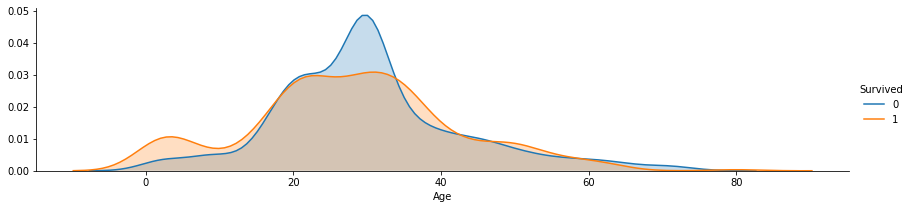

In [248]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
#facetgrid:다중 플랏 그리드를 구성(도화지를 나눔)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

(30, 40)

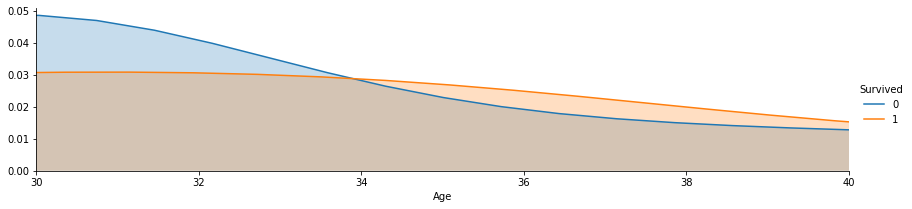

In [249]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
#facetgrid:다중 플랏 그리드를 구성(도화지를 나눔)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()
plt.xlim(30,40)

In [250]:
train['Age'] #0.42세~80세

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [251]:
for data in trainTestData:
    data.loc[data['Age']<=16,'Age']=0, #age가 16세 이하인 경우 0으로 처리
    data.loc[(data['Age']>16) & (data['Age']<=26),'Age']=1,
    data.loc[(data['Age']>26) & (data['Age']<=36),'Age']=2,
    data.loc[(data['Age']>36) & (data['Age']<=62),'Age']=3,
    data.loc[data['Age']>62,'Age']=4

In [252]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


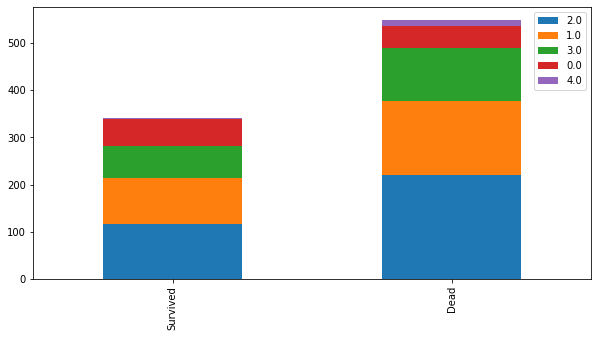

In [253]:
barChart('Age')

In [254]:
#plotly, tableau 스터디...
#plotly.com -> gallery

#pclass가 1,2,3인 승객이 승선한 항구별(Embarked) 
#승객수를 출력
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()

In [255]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class', '2nd class', '3rd class']

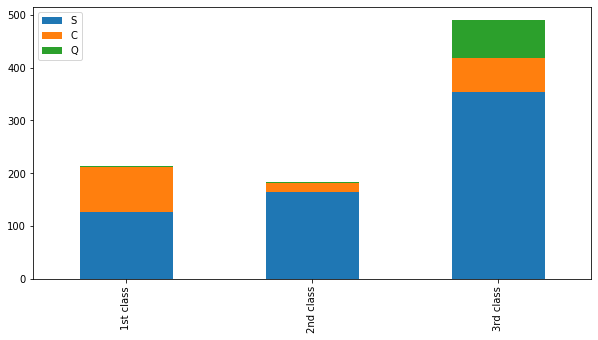

In [256]:
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [257]:
train['Embarked']=train['Embarked'].fillna('S')
#연습문제: Fare(운임)로 추정하여 승선 도시 값을 채우세요

In [258]:
#S:0, C:1, Q:2
tm={"S":0, "C":1, "Q":2}
for data in trainTestData:
    data['Embarked']=data['Embarked'].map(tm)

In [259]:
#test.info()
#fare가 null 데이터를 출력
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,0,3.0,0,0,3701,NaN,NaN,0,0


In [260]:
#test.groupby(['Embarked'])['Pclass'].mean()
test.groupby(['Embarked','Pclass'])['Fare'].mean()[0][3]
test['Fare']=test['Fare'].fillna(
    test.groupby(['Embarked','Pclass'])['Fare'].
    mean()[0][3])

In [261]:
test['Fare'].isnull().sum()

0

(0, 30)

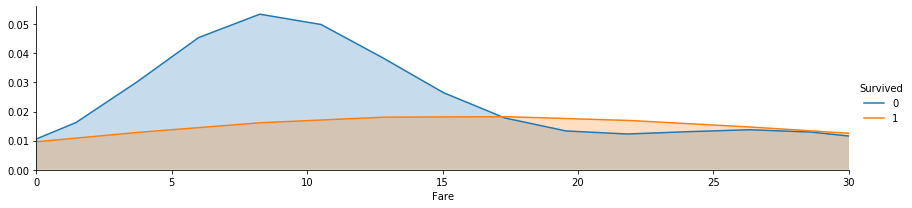

In [262]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

In [263]:
for data in trainTestData:
    data.loc[data['Fare']<=17,'Fare']=0, #age가 16세 이하인 경우 0으로 처리
    data.loc[(data['Fare']>17) & (data['Fare']<=30),'Fare']=1,
    data.loc[(data['Fare']>30) & (data['Fare']<=100),'Fare']=2,
    data.loc[data['Fare']>100,'Fare']=3


In [264]:
train['Fare'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [267]:
train.Cabin.value_counts() #객실번호

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
F33            3
              ..
C101           1
A26            1
C104           1
B37            1
D37            1
Name: Cabin, Length: 147, dtype: int64

In [288]:
for data in trainTestData:
    data['Cabin']=data.Cabin.str[:1]

In [289]:
train['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [294]:
#train에서 Pclass가 1인 데이터에 대해,
#Cabin 컬럼값의 종류별 개수를 출력
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()

In [302]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df
df.index=["1st class", '2nd class', '3rd class']

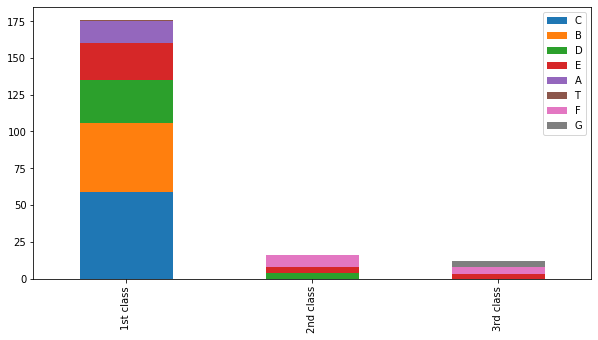

In [303]:
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [304]:
tm={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,
   "G":2.4,"T":2.8} #T는 알아서 변경해보세요
for data in trainTestData:
    data['Cabin']=data['Cabin'].map(tm)

In [305]:
# pclass별로 그룹화, 그룹별로 cabin 열 값에 대한 
# 중앙값으로 결측값을 대체하세요.(train, test)
train['Cabin'].fillna(
    train.groupby('Pclass')['Cabin'].
    transform('median'), inplace=True)

In [306]:
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


In [310]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

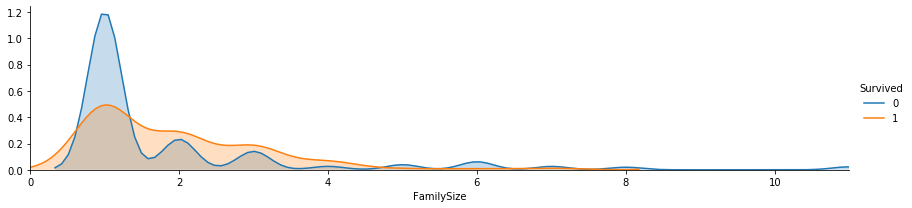

In [311]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

In [312]:
tm={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2.0,
    7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4.0} #T는 알아서 변경해보세요
for data in trainTestData:
    data['FamilySize']=data['FamilySize'].map(tm)

In [313]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FamilySize   891 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 90.6+ KB


In [315]:
train=train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)
test=test.drop(['Ticket', 'SibSp', 'Parch'], axis=1)                  

In [320]:
train=train.drop(['PassengerId'], axis=1)
trainData=train.drop(['Survived'],axis=1)
target=train['Survived']
#trainData -> 모델 -> 예측  == 정답(target)\

KeyError: "['PassengerId'] not found in axis"

In [319]:
trainData.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title',
       'FamilySize'],
      dtype='object')

In [321]:
trainData

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1.0,1.0,0.4,0,1,0.0
888,3,1,1.0,1.0,2.0,0,1,1.2
889,1,0,1.0,1.0,0.8,1,0,0.0
